# КОЛИЧЕСТВО ПРОДАННЫХ В МЕСЯЦ

# ПРОГНОЗИРОВАНИЕ

# №2

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0hv0sp4y
  JVM stdout: /tmp/tmp0hv0sp4y/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0hv0sp4y/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,2 months
H2O_cluster_name:,H2O_from_python_unknownUser_s1a1vl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
#file = '/content/drive/MyDrive/Colab Notebooks/Diplom/df4eda2clean2.csv'
file = 'df2prep4regressionV5.csv'
df = h2o.import_file(file)
df = df.drop('C1')
#df = df.drop('Revenue_T')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Units,Manufacturer,Segment,MonthNo,District,Revenue_cat
12,Natura,Convenience,12,District #02,58
7,Pirum,Productivity,12,District #38,51
3,VanArsdel,Moderation,12,District #10,58
3,Currus,Select,12,District #38,58
3,Abbas,Moderation,12,District #36,58
2,Natura,Youth,12,District #06,17
2,Natura,Youth,12,District #13,17
2,Quibus,Select,12,District #18,45
2,VanArsdel,Moderation,12,District #05,58
2,Currus,All Season,12,District #03,45


In [3]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])

In [4]:
train

Units,Manufacturer,Segment,MonthNo,District,Revenue_cat
12,Natura,Convenience,12,District #02,58
7,Pirum,Productivity,12,District #38,51
3,VanArsdel,Moderation,12,District #10,58
3,Currus,Select,12,District #38,58
2,Natura,Youth,12,District #06,17
2,Natura,Youth,12,District #13,17
2,Quibus,Select,12,District #18,45
2,VanArsdel,Moderation,12,District #05,58
2,Currus,All Season,12,District #03,45
2,Natura,Moderation,12,District #10,58


In [5]:
valid

Units,Manufacturer,Segment,MonthNo,District,Revenue_cat
3,Abbas,Moderation,12,District #36,58
1,VanArsdel,Convenience,12,District #24,40
1,Natura,Extreme,12,District #39,42
1,VanArsdel,Moderation,12,District #20,55
1,VanArsdel,Moderation,12,District #38,58
1,VanArsdel,Moderation,12,District #30,57
1,VanArsdel,Moderation,12,District #03,57
1,VanArsdel,Moderation,12,District #05,57
1,VanArsdel,Moderation,12,District #28,57
1,Currus,Extreme,12,District #03,45


In [6]:
unseen

Units,Manufacturer,Segment,MonthNo,District,Revenue_cat
1,Aliqui,Extreme,12,District #31,45
1,Aliqui,Extreme,12,District #13,45
1,Aliqui,Extreme,12,District #21,40
1,Aliqui,Extreme,12,District #34,41
1,VanArsdel,Moderation,12,District #30,55
1,Currus,Extreme,12,District #36,42
1,VanArsdel,Moderation,12,District #13,57
1,VanArsdel,Moderation,12,District #01,57
1,VanArsdel,Moderation,12,District #10,57
1,Currus,Extreme,12,District #07,45


In [7]:
y = "Units"
x=train.columns
x.remove(y)

# Тренировка модели

In [8]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y,  training_frame = train, validation_frame = valid)

AutoML progress: |
12:35:50.707: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/10
# GBM base models (used / total),2/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [9]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230925_123550,0.441913,0.195287,0.0941207,0.0948886,0.195287
StackedEnsemble_BestOfFamily_1_AutoML_1_20230925_123550,0.443177,0.196406,0.0974213,0.0961309,0.196406
GBM_1_AutoML_1_20230925_123550,0.446298,0.199182,0.0996866,0.0969329,0.199182
GBM_3_AutoML_1_20230925_123550,0.449965,0.202469,0.0960373,0.0969129,0.202469
XGBoost_3_AutoML_1_20230925_123550,0.451911,0.204223,0.103681,0.0990823,0.204223
GBM_2_AutoML_1_20230925_123550,0.45198,0.204286,0.100916,0.0984524,0.204286
GBM_4_AutoML_1_20230925_123550,0.452703,0.20494,0.096707,0.0975045,0.20494
XGBoost_2_AutoML_1_20230925_123550,0.45397,0.206089,0.0994415,0.0994801,0.206089
XGBoost_1_AutoML_1_20230925_123550,0.45492,0.206952,0.10516,0.100537,0.206952
DRF_1_AutoML_1_20230925_123550,0.471426,0.222243,0.109047,0.102058,0.222243


In [10]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20230925_123550',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230925_123550',
 'GBM_1_AutoML_1_20230925_123550',
 'GBM_3_AutoML_1_20230925_123550',
 'XGBoost_3_AutoML_1_20230925_123550',
 'GBM_2_AutoML_1_20230925_123550',
 'GBM_4_AutoML_1_20230925_123550',
 'XGBoost_2_AutoML_1_20230925_123550',
 'XGBoost_1_AutoML_1_20230925_123550',
 'DRF_1_AutoML_1_20230925_123550',
 'XRT_1_AutoML_1_20230925_123550',
 'GLM_1_AutoML_1_20230925_123550']

In [11]:
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
se

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/10
# GBM base models (used / total),2/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [12]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [13]:
metalearner.coef_norm()

{'Intercept': 1.0861749466625799,
 'GBM_1_AutoML_1_20230925_123550': 0.13849239530575885,
 'GBM_3_AutoML_1_20230925_123550': 0.0326305532403471,
 'XGBoost_3_AutoML_1_20230925_123550': 0.07653402913530455,
 'GBM_2_AutoML_1_20230925_123550': 0.0,
 'GBM_4_AutoML_1_20230925_123550': 0.0,
 'XGBoost_2_AutoML_1_20230925_123550': 0.08060044333423144,
 'XGBoost_1_AutoML_1_20230925_123550': 0.051123117122509255,
 'DRF_1_AutoML_1_20230925_123550': 0.0,
 'XRT_1_AutoML_1_20230925_123550': 0.0,
 'GLM_1_AutoML_1_20230925_123550': 0.0}

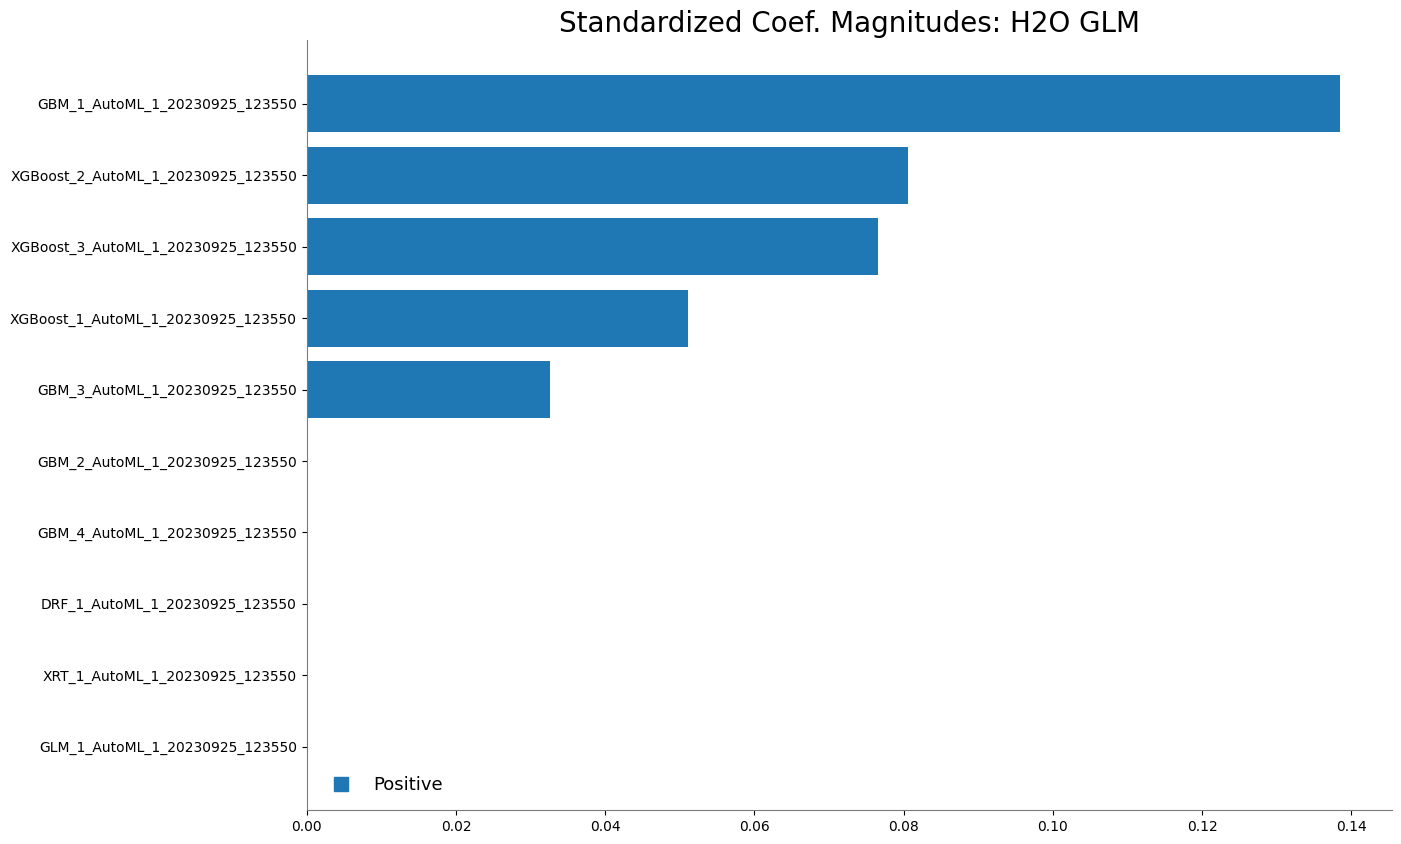

In [14]:
%matplotlib inline
metalearner.std_coef_plot()

# Что с важностью признаков

Model ID: StackedEnsemble_AllModels_1_AutoML_1_20230925_123550
StackedEnsemble_AllModels_1_AutoML_1_20230925_123550 - ERROR PLOTTING
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20230925_123550
StackedEnsemble_BestOfFamily_1_AutoML_1_20230925_123550 - ERROR PLOTTING
Model ID: GBM_1_AutoML_1_20230925_123550


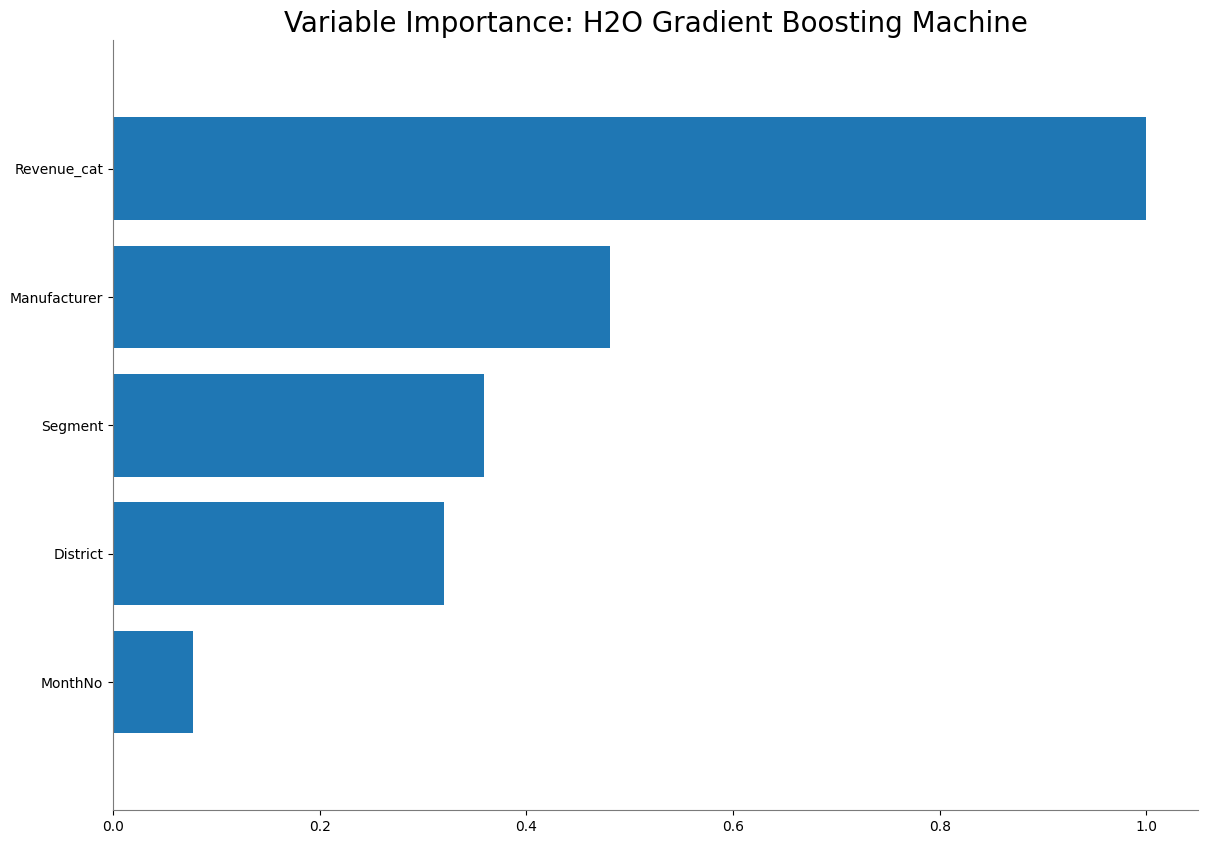

Model ID: GBM_3_AutoML_1_20230925_123550


<Figure size 640x480 with 0 Axes>

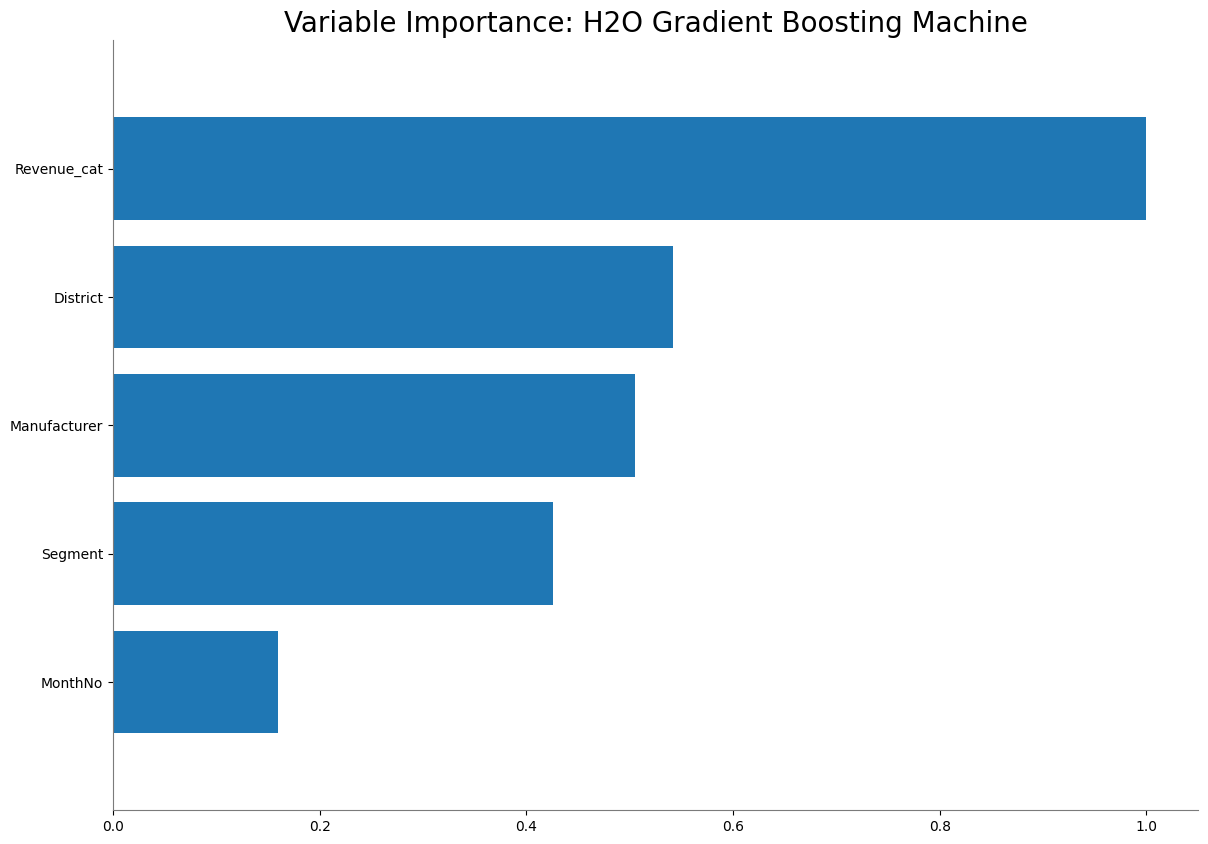

Model ID: XGBoost_3_AutoML_1_20230925_123550


<Figure size 640x480 with 0 Axes>

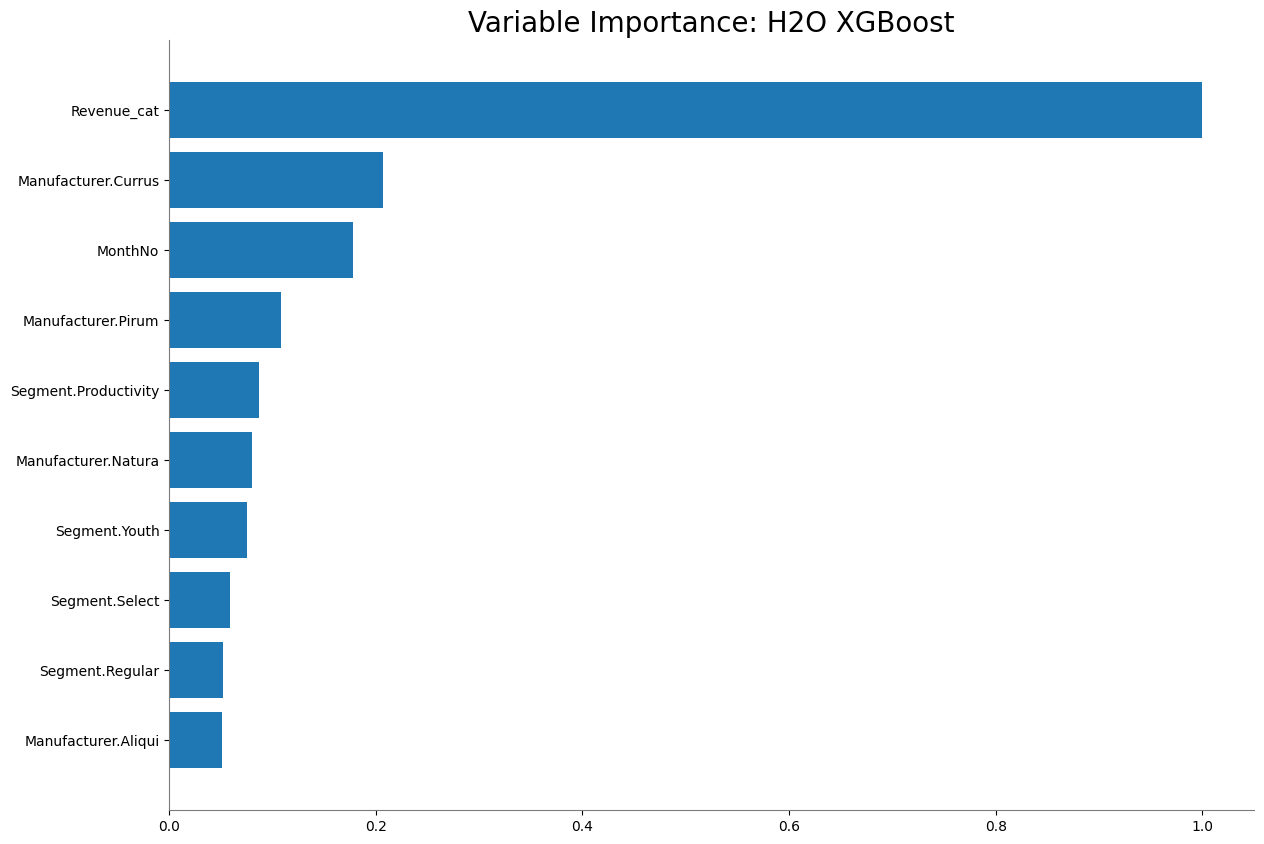

Model ID: GBM_2_AutoML_1_20230925_123550


<Figure size 640x480 with 0 Axes>

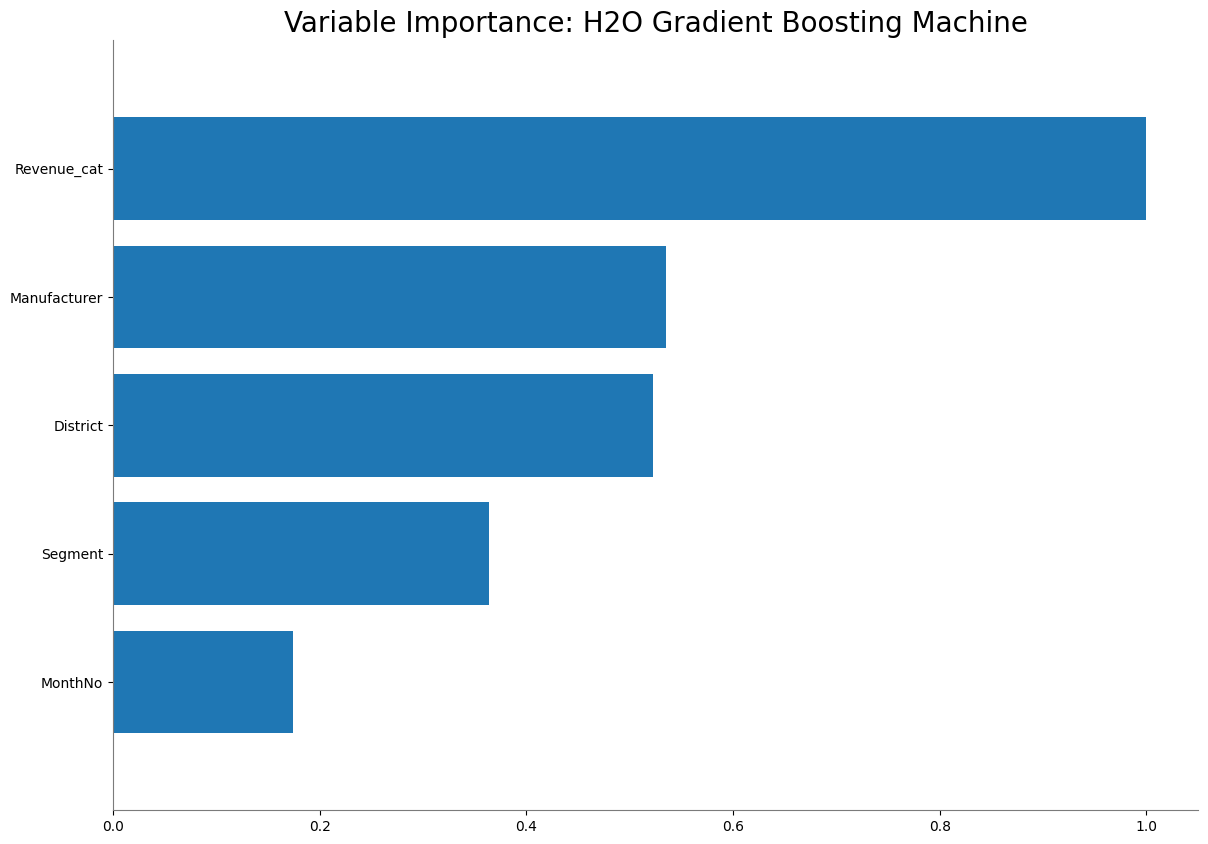

Model ID: GBM_4_AutoML_1_20230925_123550


<Figure size 640x480 with 0 Axes>

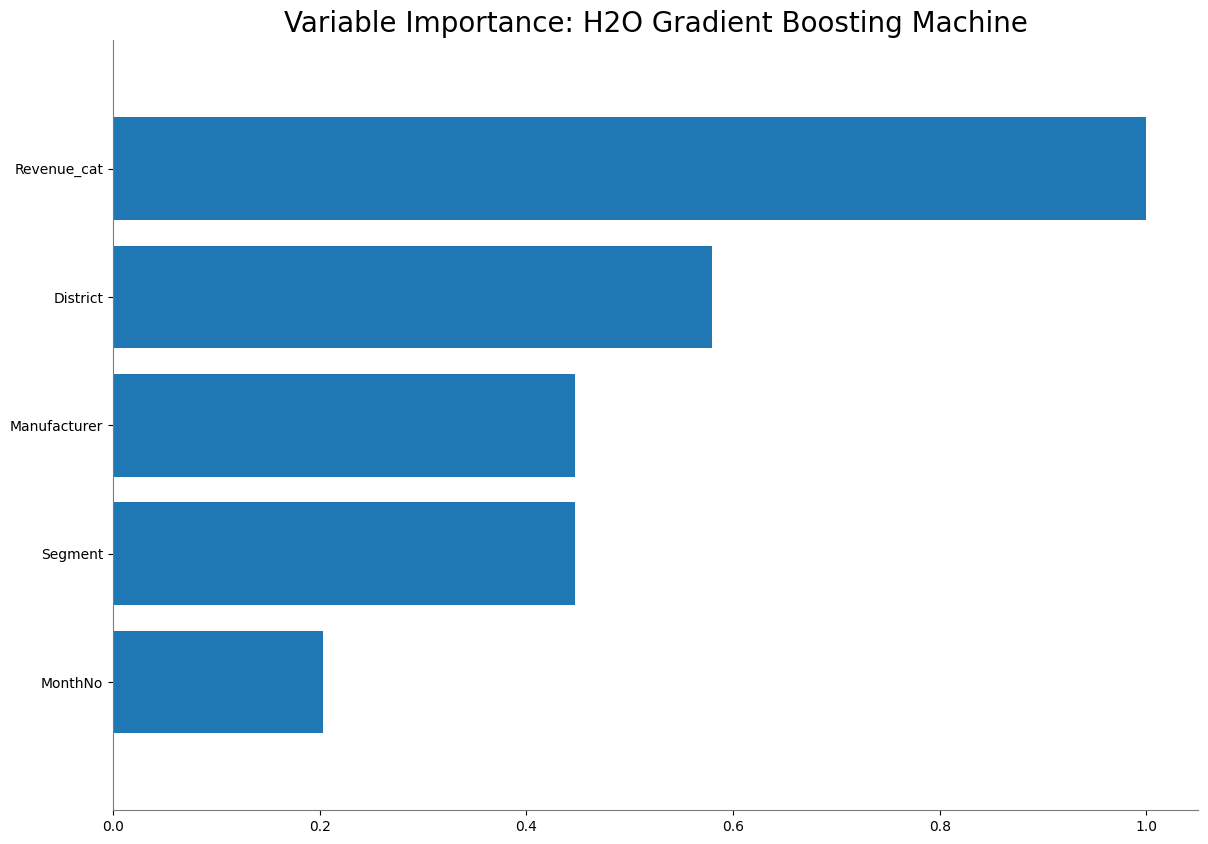

Model ID: XGBoost_2_AutoML_1_20230925_123550


<Figure size 640x480 with 0 Axes>

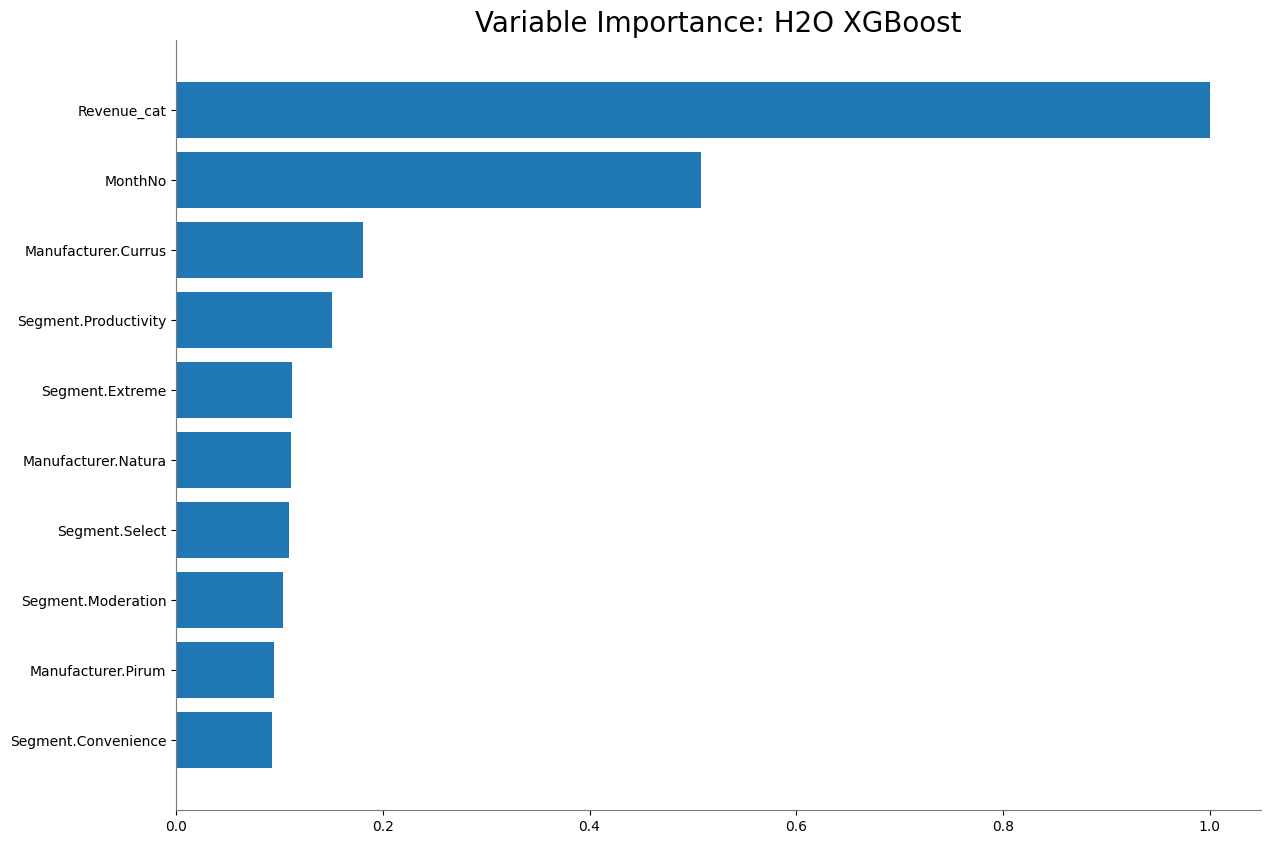

Model ID: XGBoost_1_AutoML_1_20230925_123550


<Figure size 640x480 with 0 Axes>

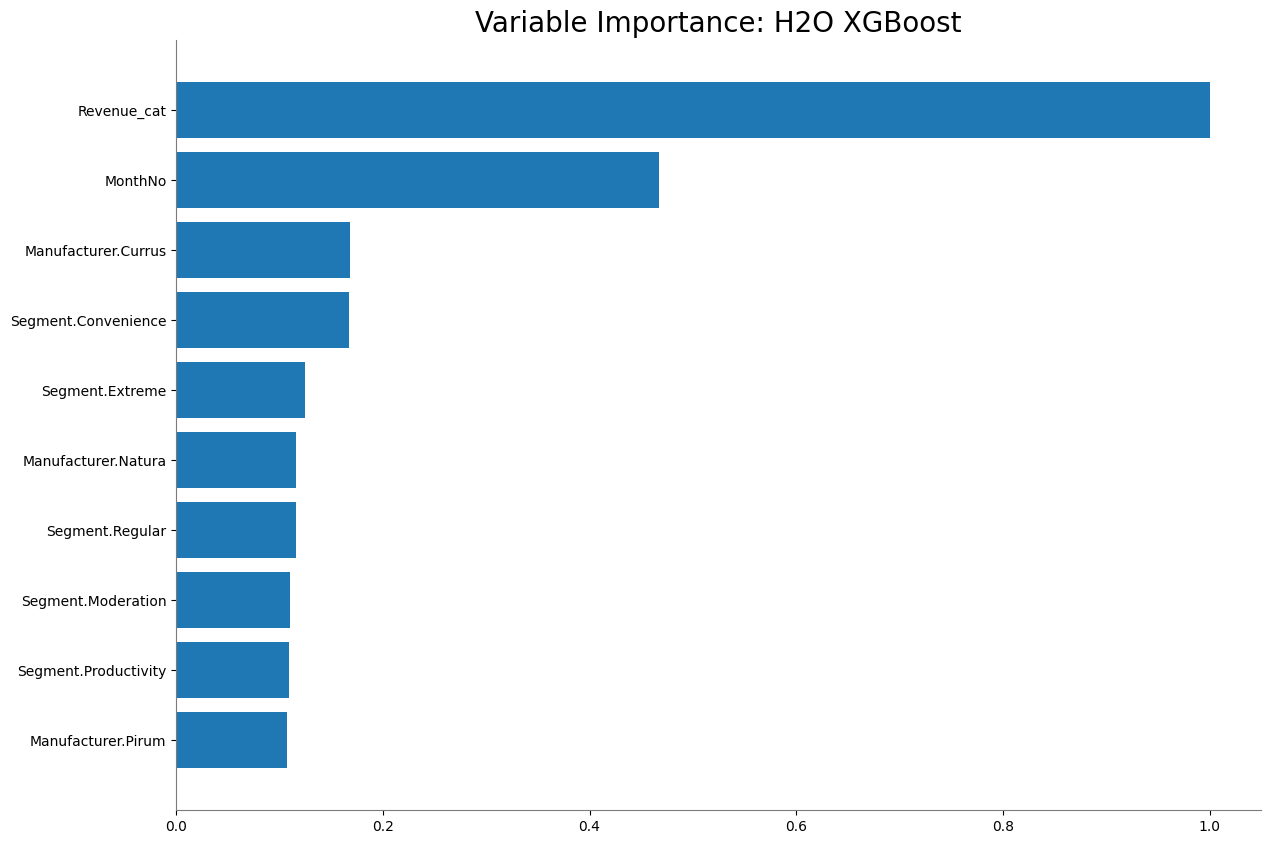

Model ID: DRF_1_AutoML_1_20230925_123550


<Figure size 640x480 with 0 Axes>

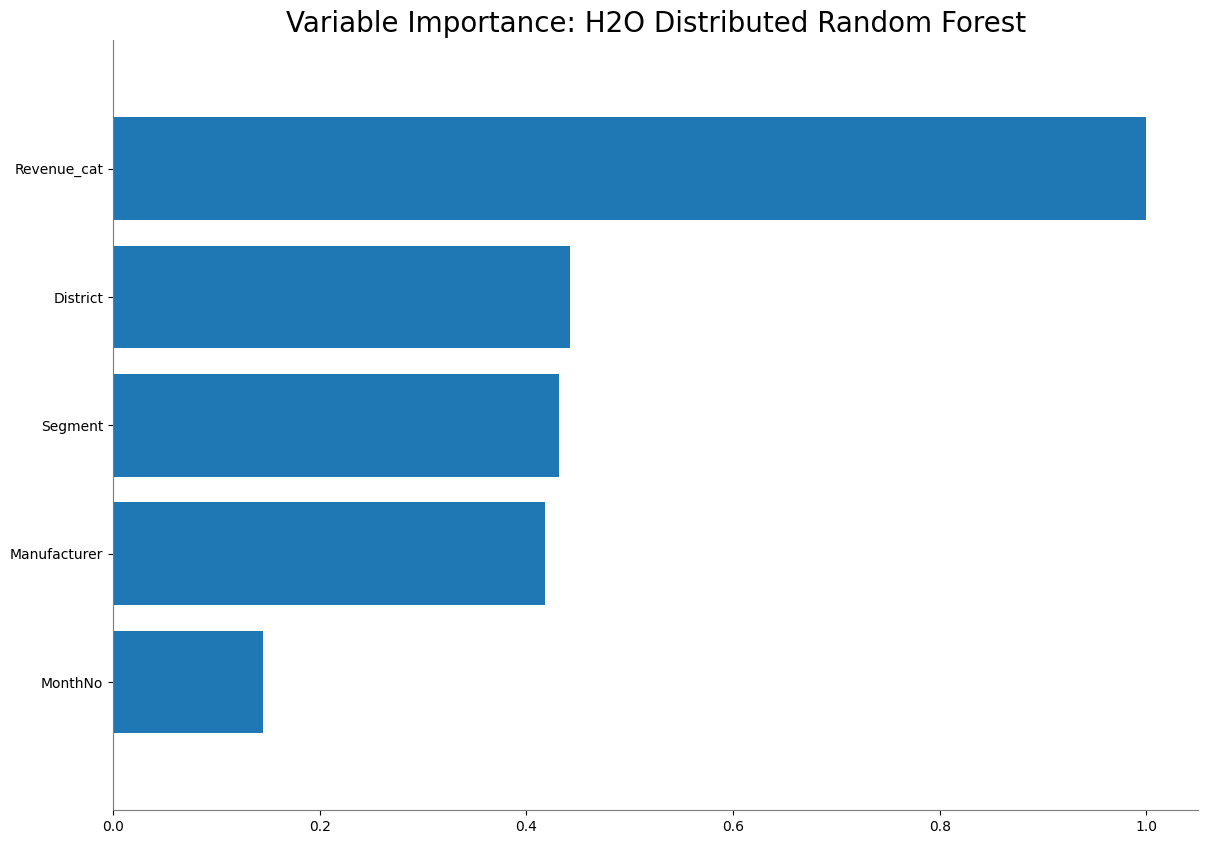

Model ID: XRT_1_AutoML_1_20230925_123550


<Figure size 640x480 with 0 Axes>

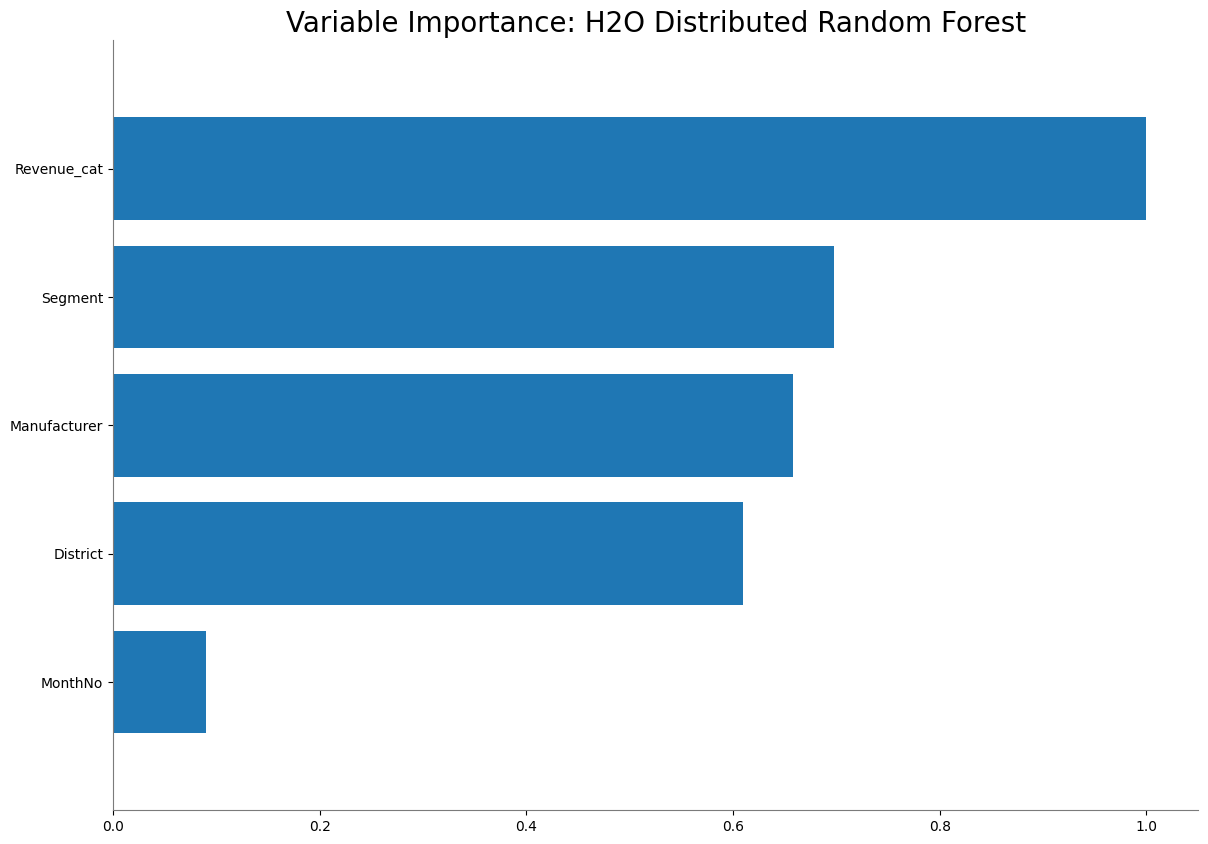

Model ID: GLM_1_AutoML_1_20230925_123550


<Figure size 640x480 with 0 Axes>

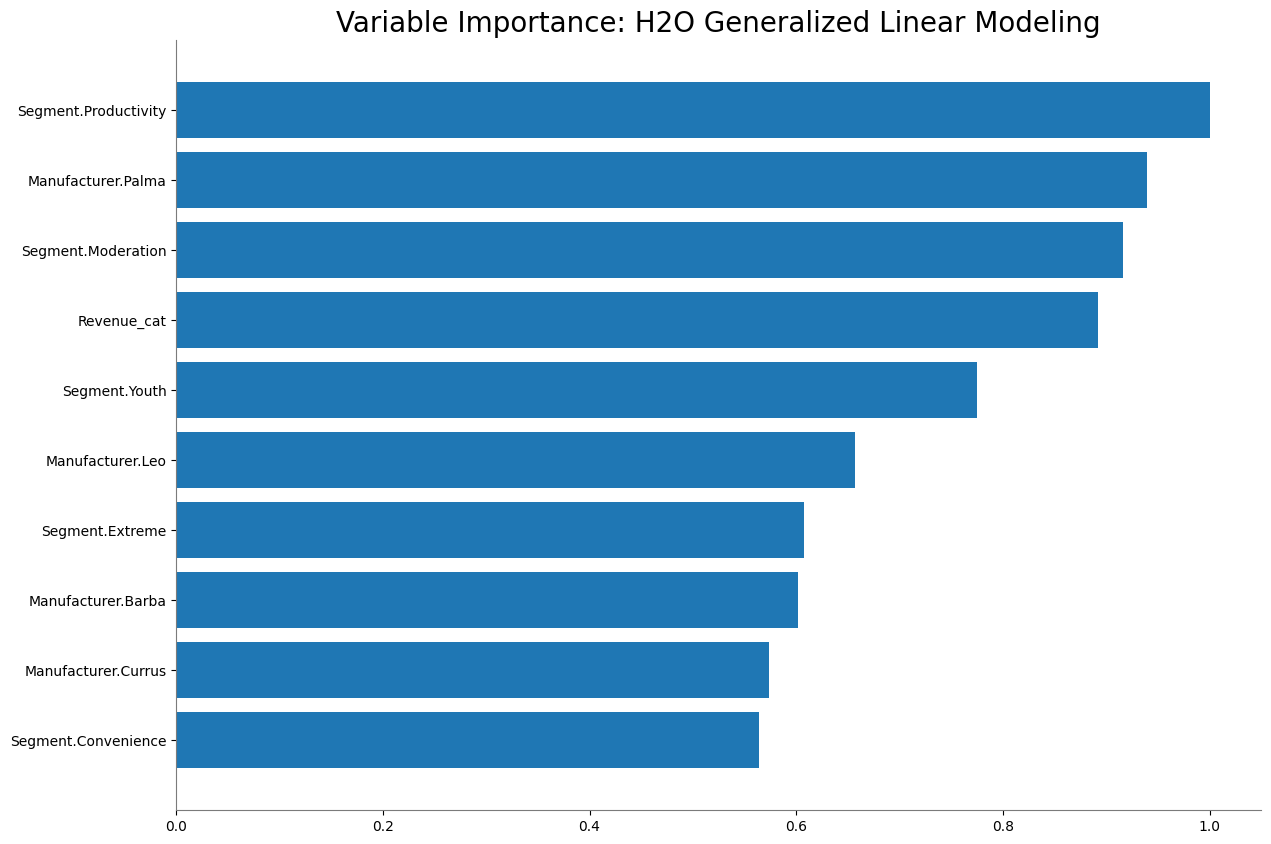

<Figure size 640x480 with 0 Axes>

In [15]:
for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    aml_unit.varimp_plot()
  except:
    print(f"{model_id} - ERROR PLOTTING") 

# Что с переобученносью

In [16]:
import pandas as pd
from sklearn.metrics import r2_score

for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    perf = aml_unit.model_performance(valid)
    print(perf)
    print(f"R2 cross validation: {aml_unit.r2()}")
    print(f"R2 test validation: {aml_unit.r2(valid=True)}")
    # прогноз лидирующей моделю на валидационной выборке
    val_pred=aml_unit.predict(unseen).as_data_frame()
    # из валидационного датасеат возбму столбец Stay и сконвертиую его в пандас датафрейм
    val_test = unseen['Units'].as_data_frame()
    r2_unseen = r2_score(val_test, val_pred)
    print(f"R2 unseen dataset validation: {r2_unseen}")
    print("-------------------\n-------------------")
  except:
    print(f"{model_id} - ERROR CALCULATE PERFOMANCE")

Model ID: StackedEnsemble_AllModels_1_AutoML_1_20230925_123550
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.22779122145937114
RMSE: 0.4772747861131689
MAE: 0.09262484771217117
RMSLE: 0.09208113628244935
Mean Residual Deviance: 0.22779122145937114
R^2: 0.4317065773077988
Null degrees of freedom: 35313
Residual degrees of freedom: 35308
Null deviance: 14155.273836472303
Residual deviance: 8044.219194616232
AIC: 47989.88066198009
R2 cross validation: 0.614939717816614
R2 test validation: 0.4317065773077988
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
R2 unseen dataset validation: 0.4278975568503255
-------------------
-------------------
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20230925_123550
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.2294510383883011
RMSE: 0.47901047837004684
MAE: 0.09553076322511053
RMSLE: 0.09314862795411835
Mean Residual Deviance: 0.22945

# Графии кривых обучения

StackedEnsemble_BestOfFamily_1_AutoML_1_20230925_123550 - ERROR PLOT


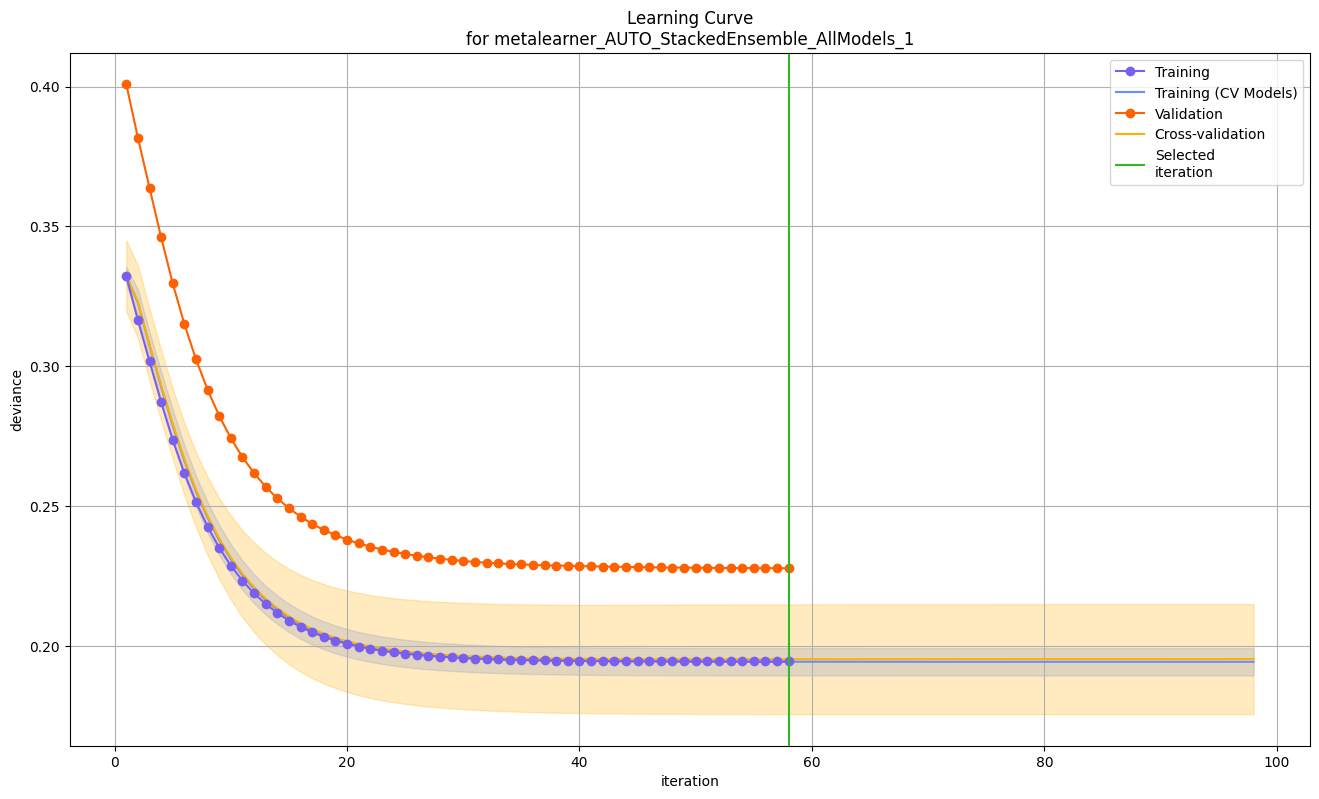

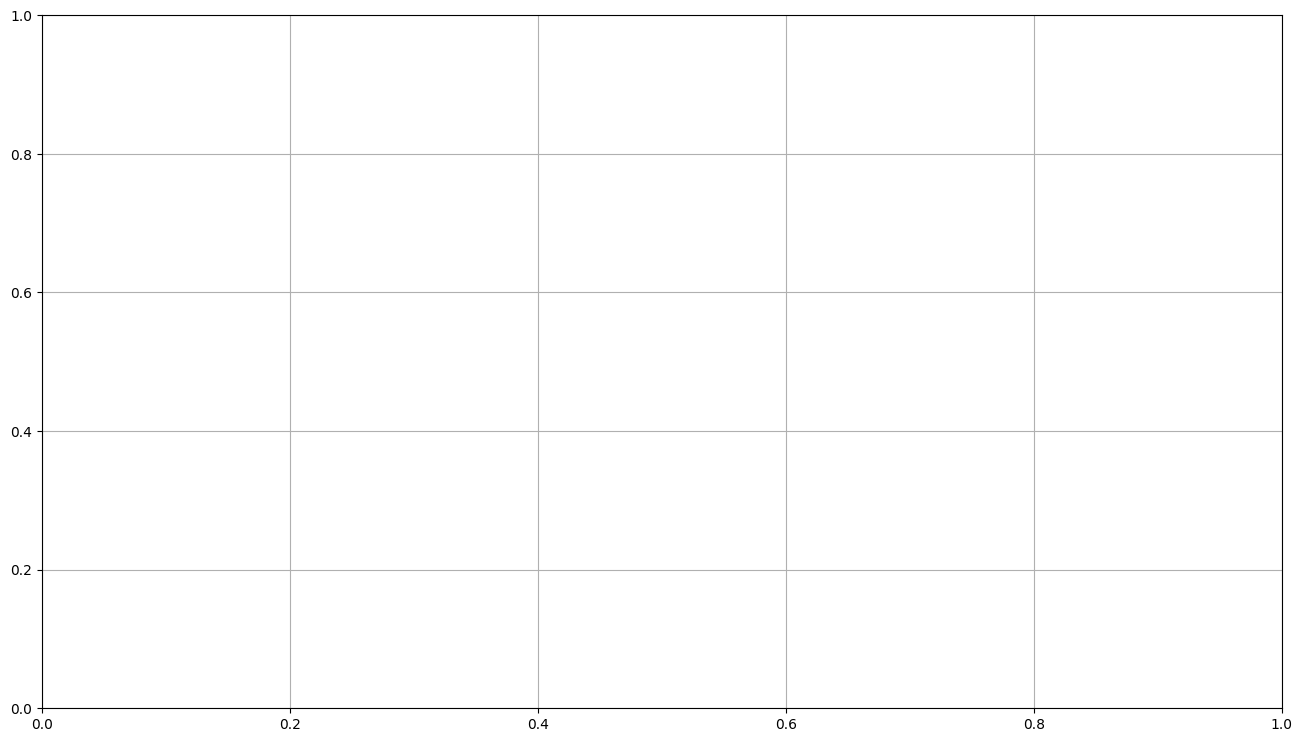

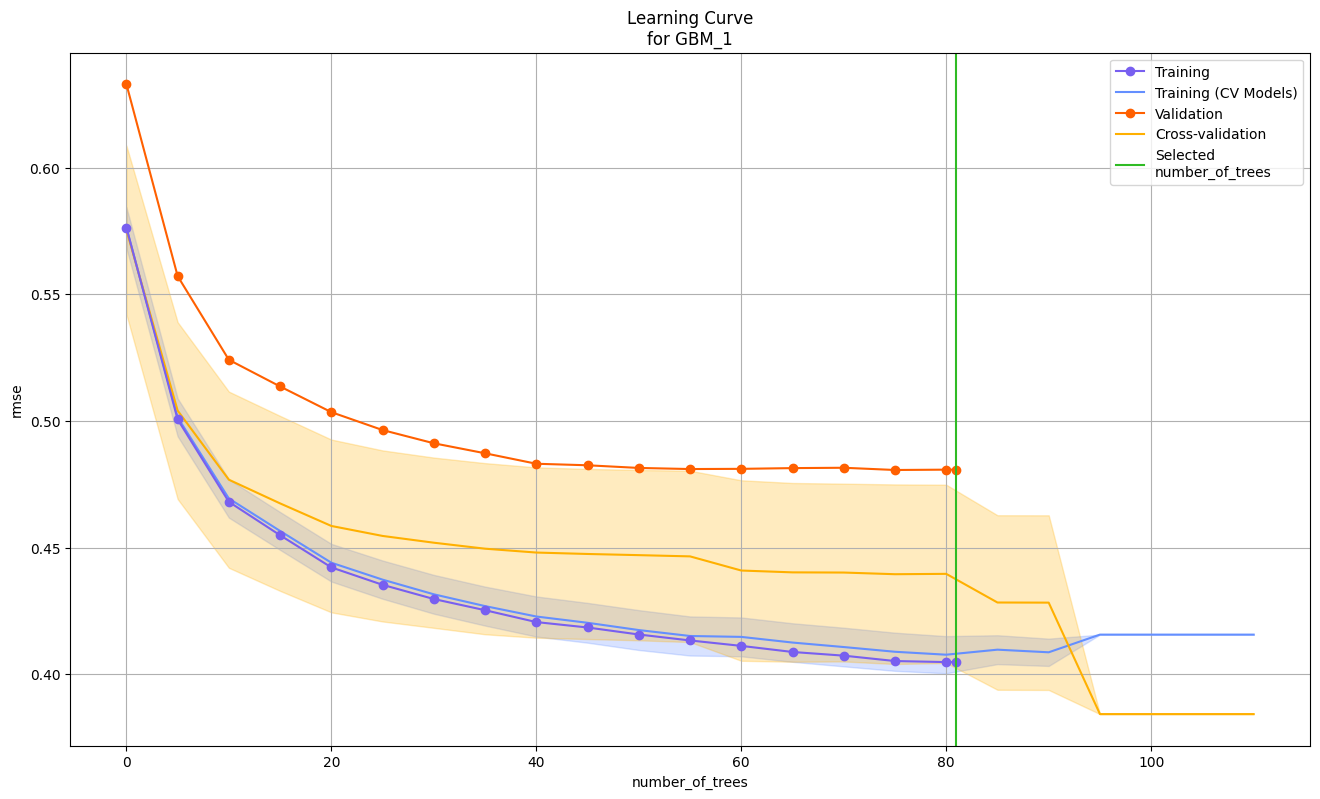

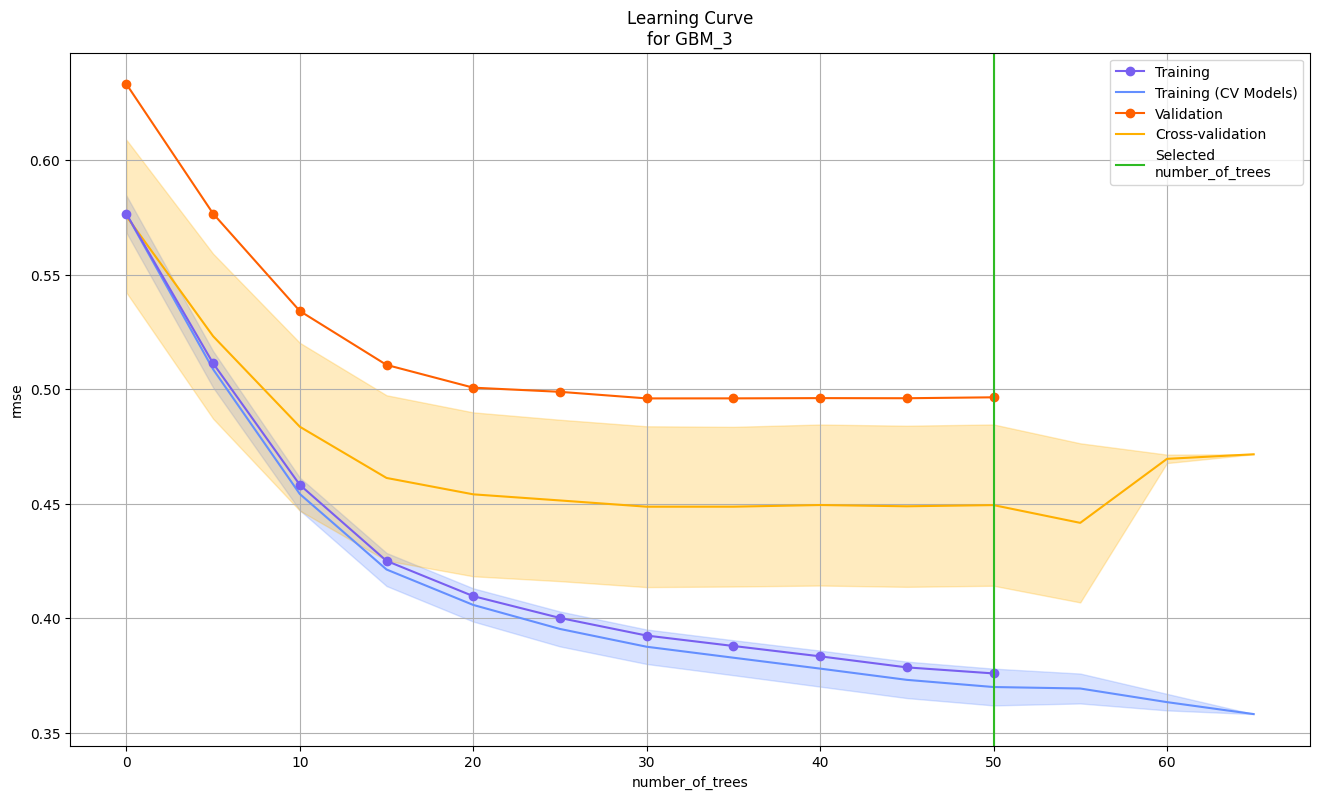

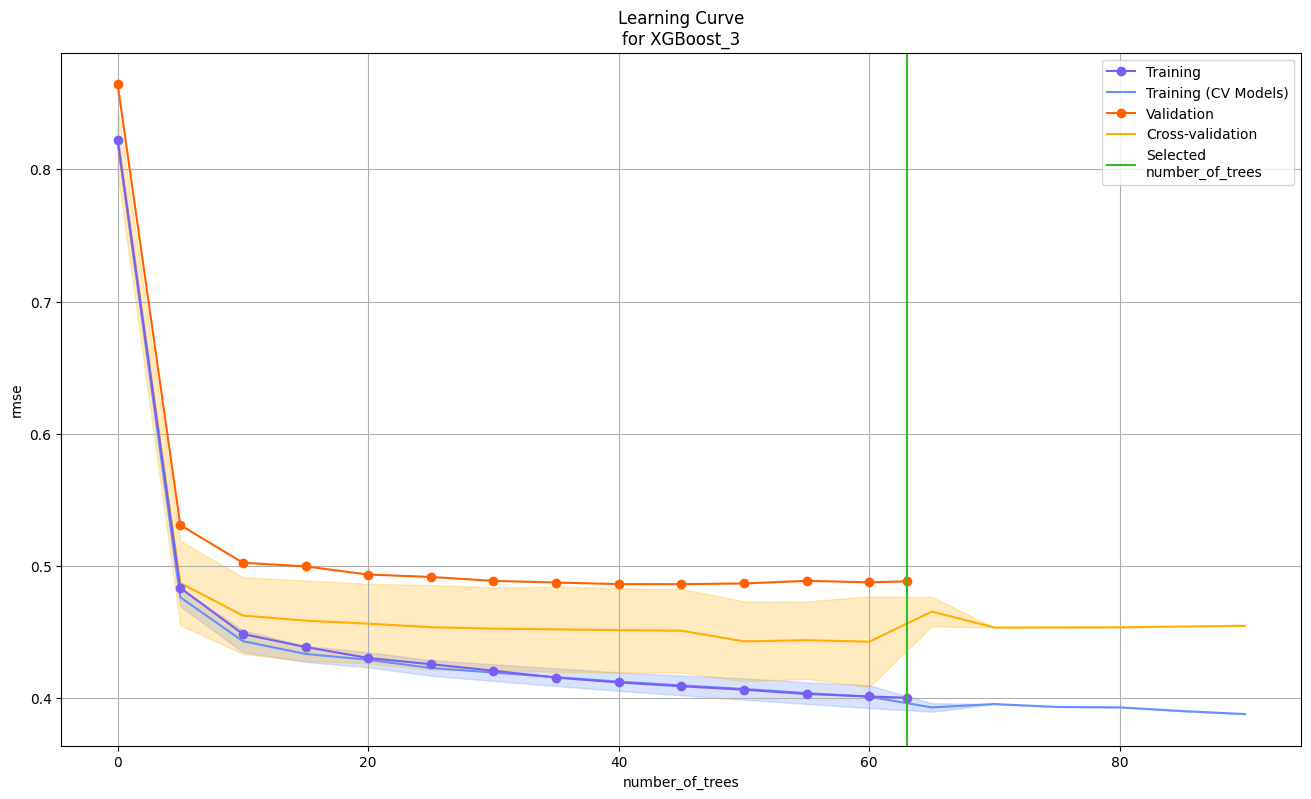

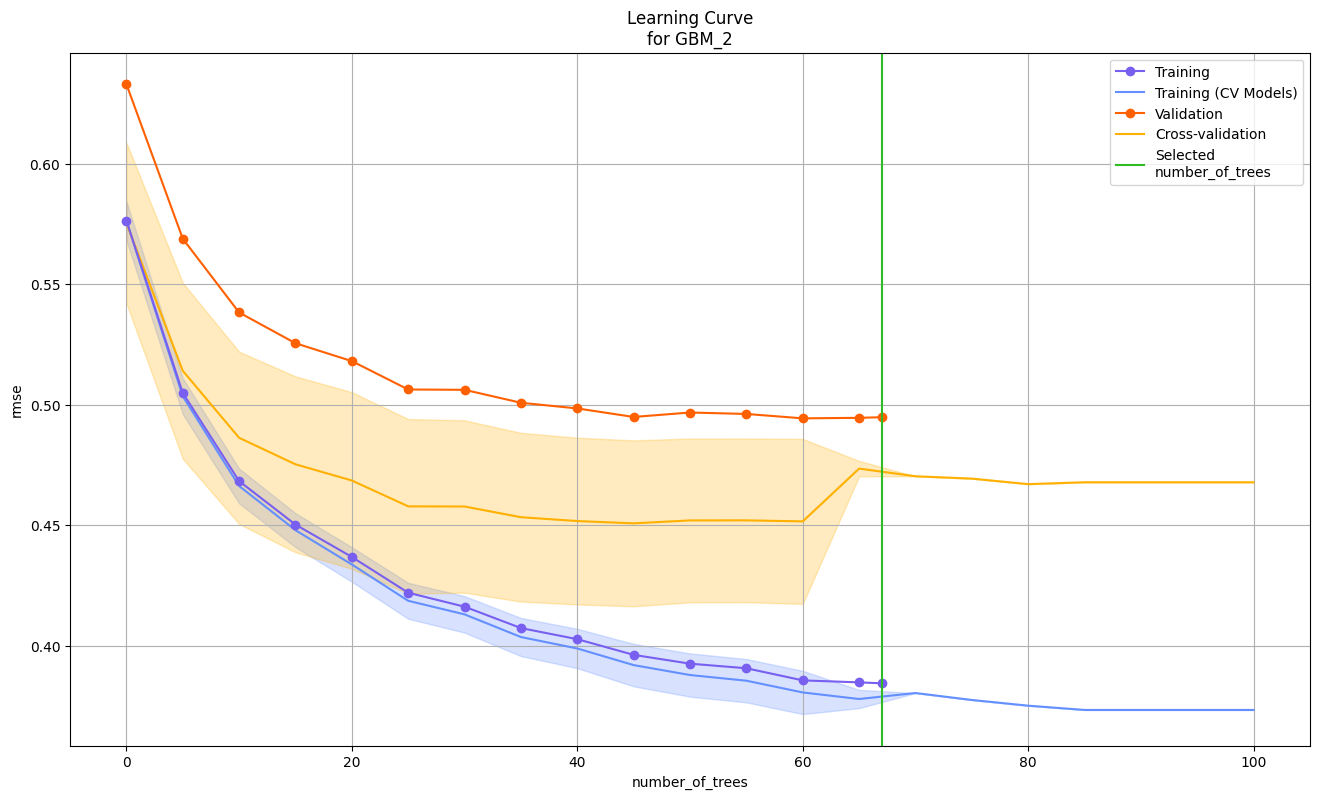

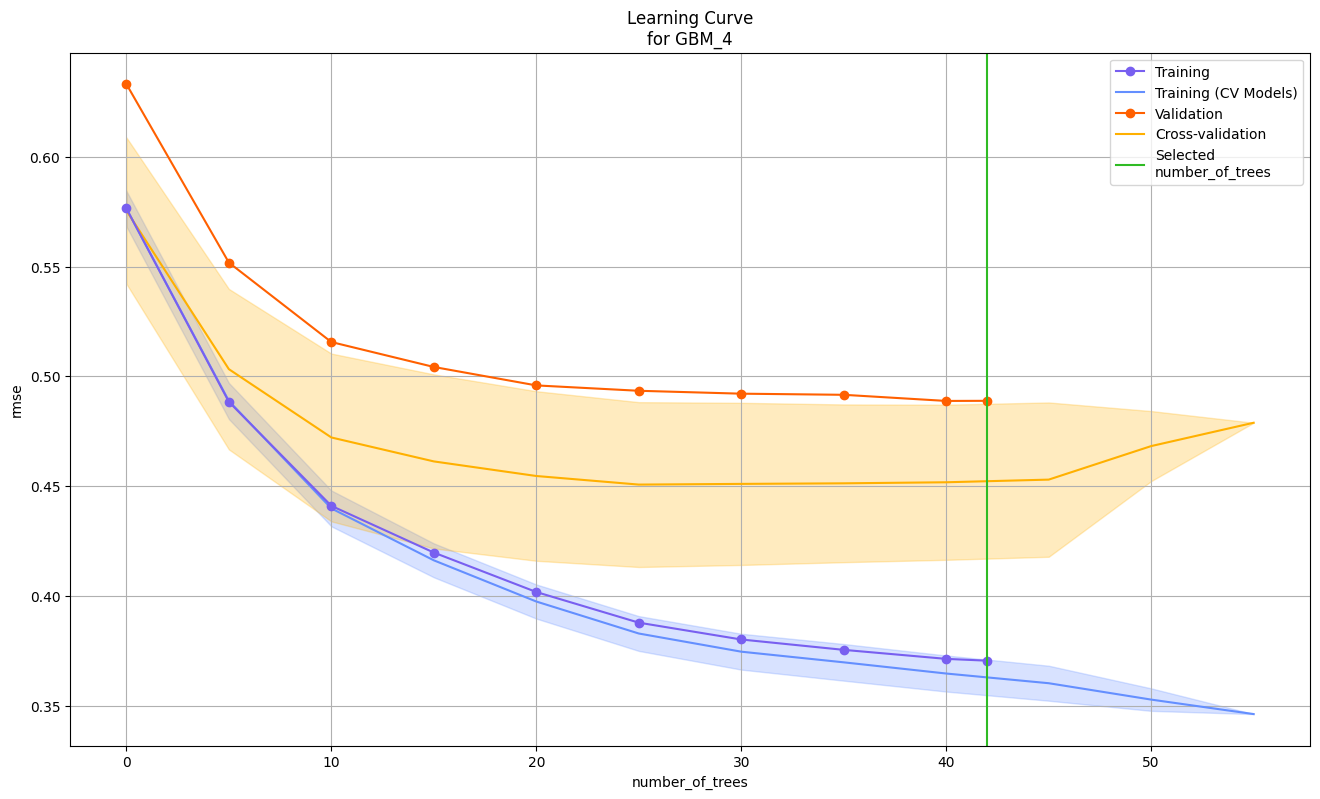

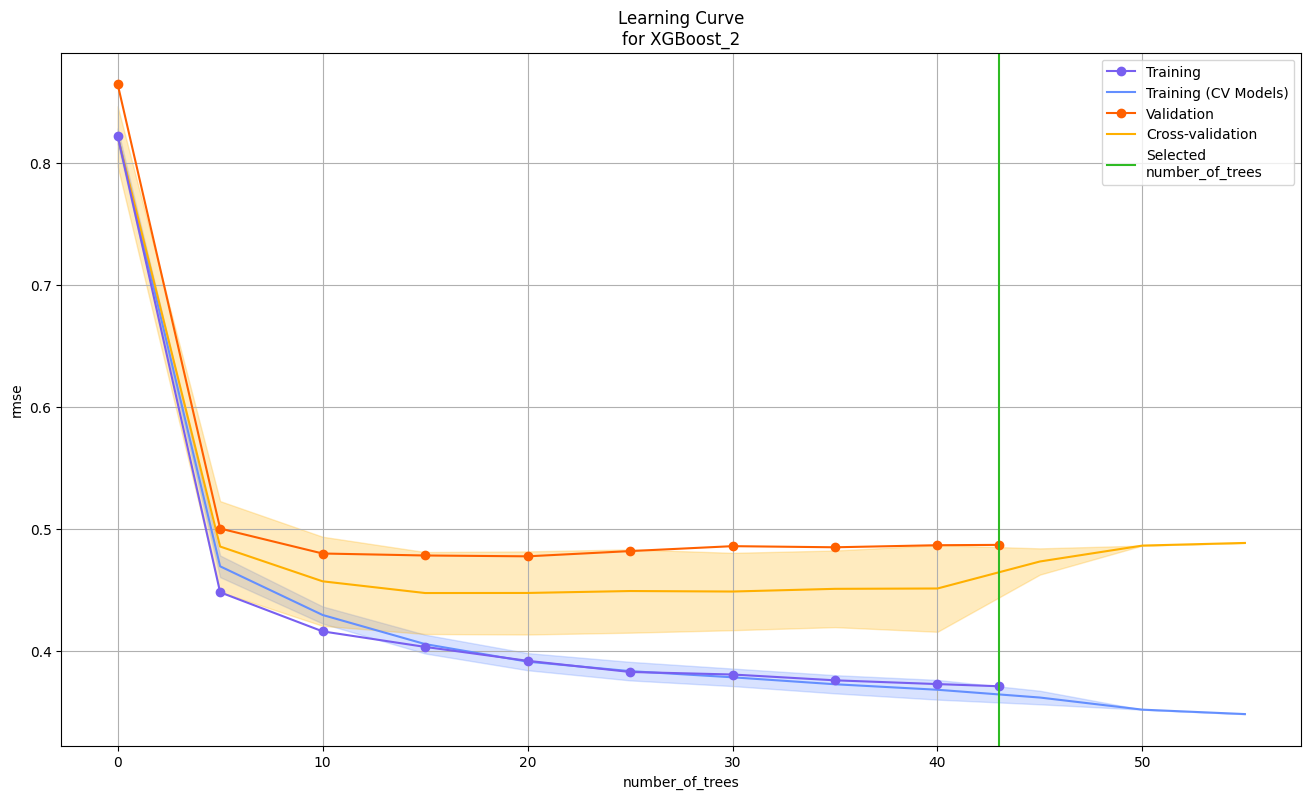

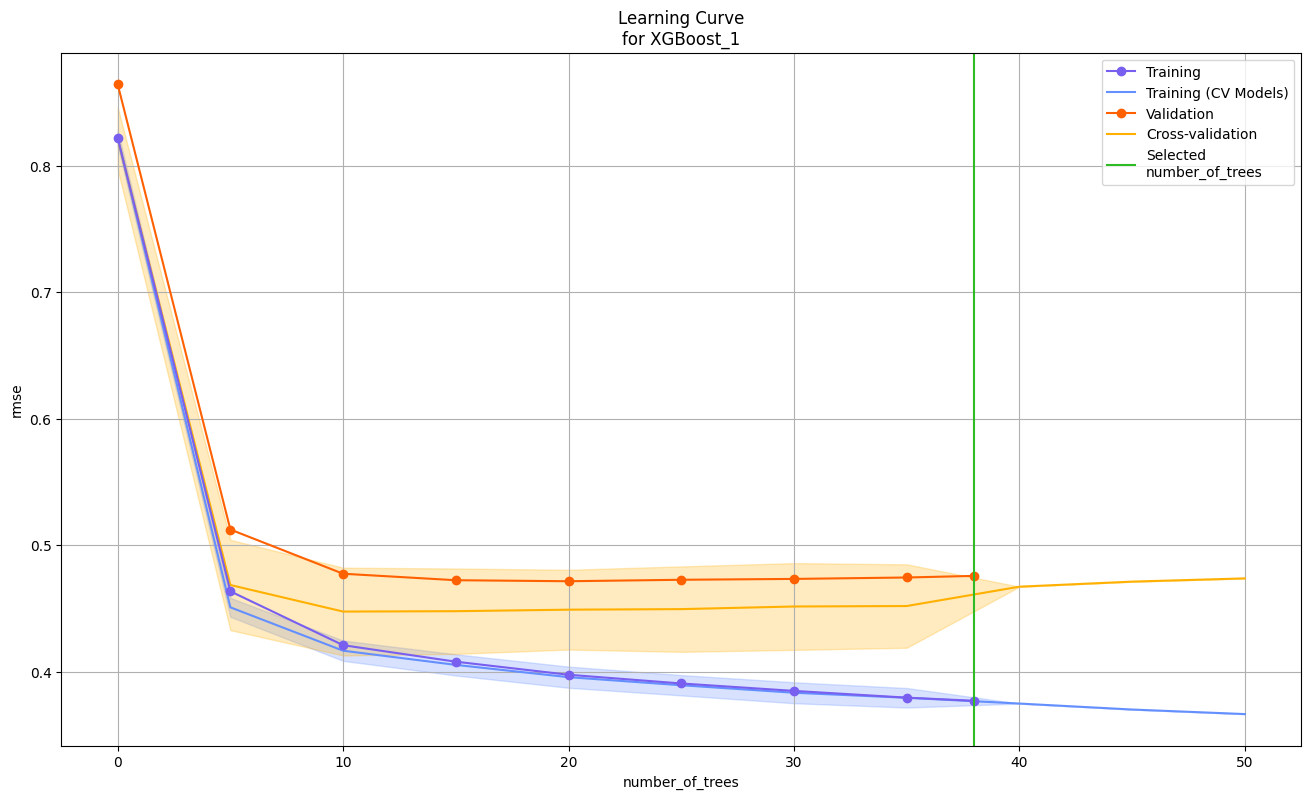

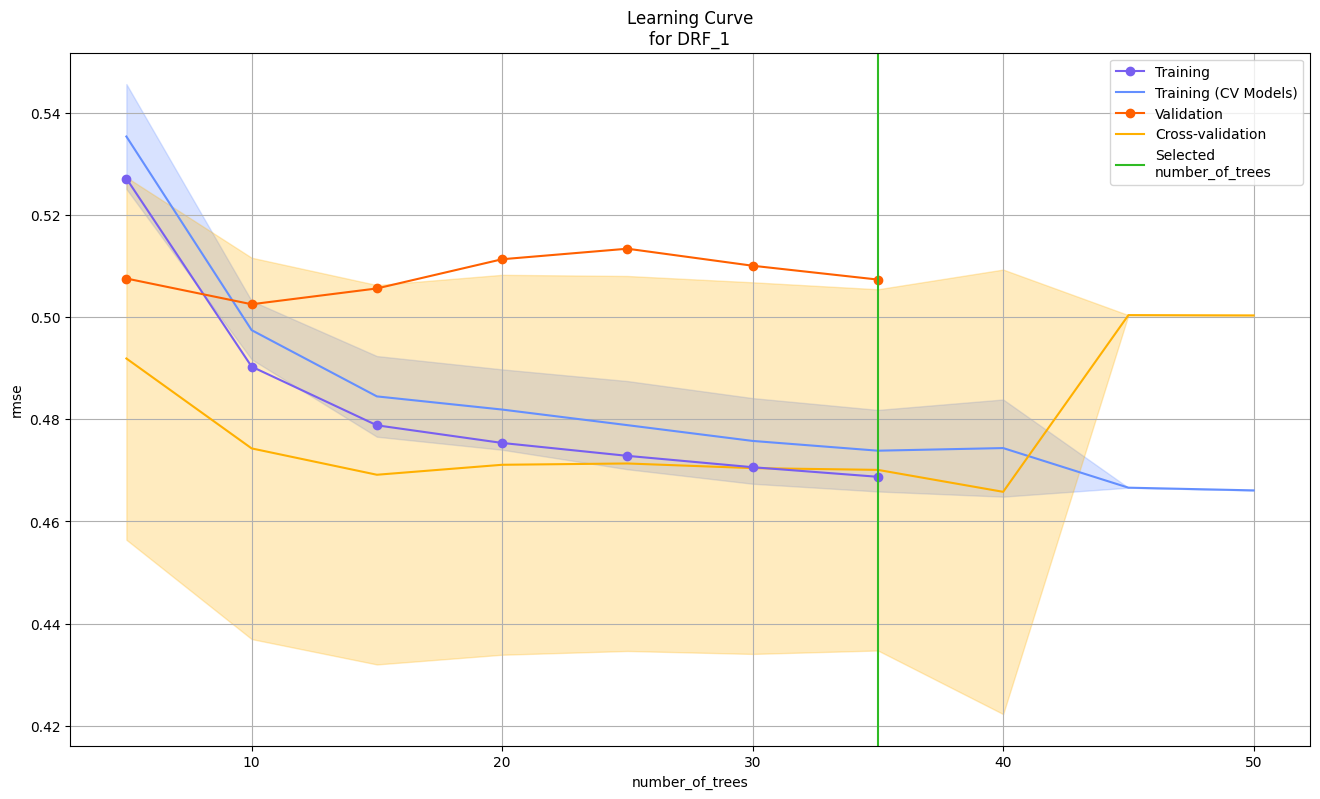

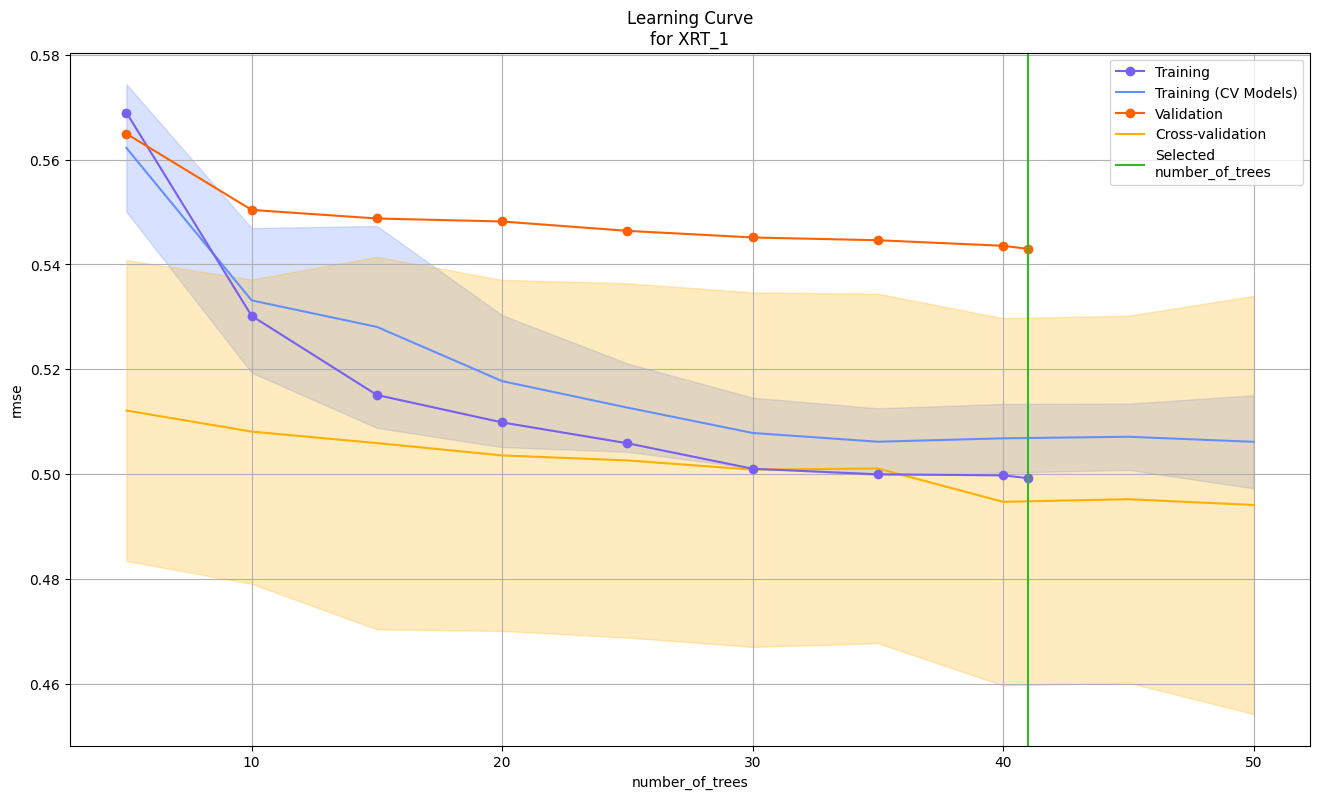

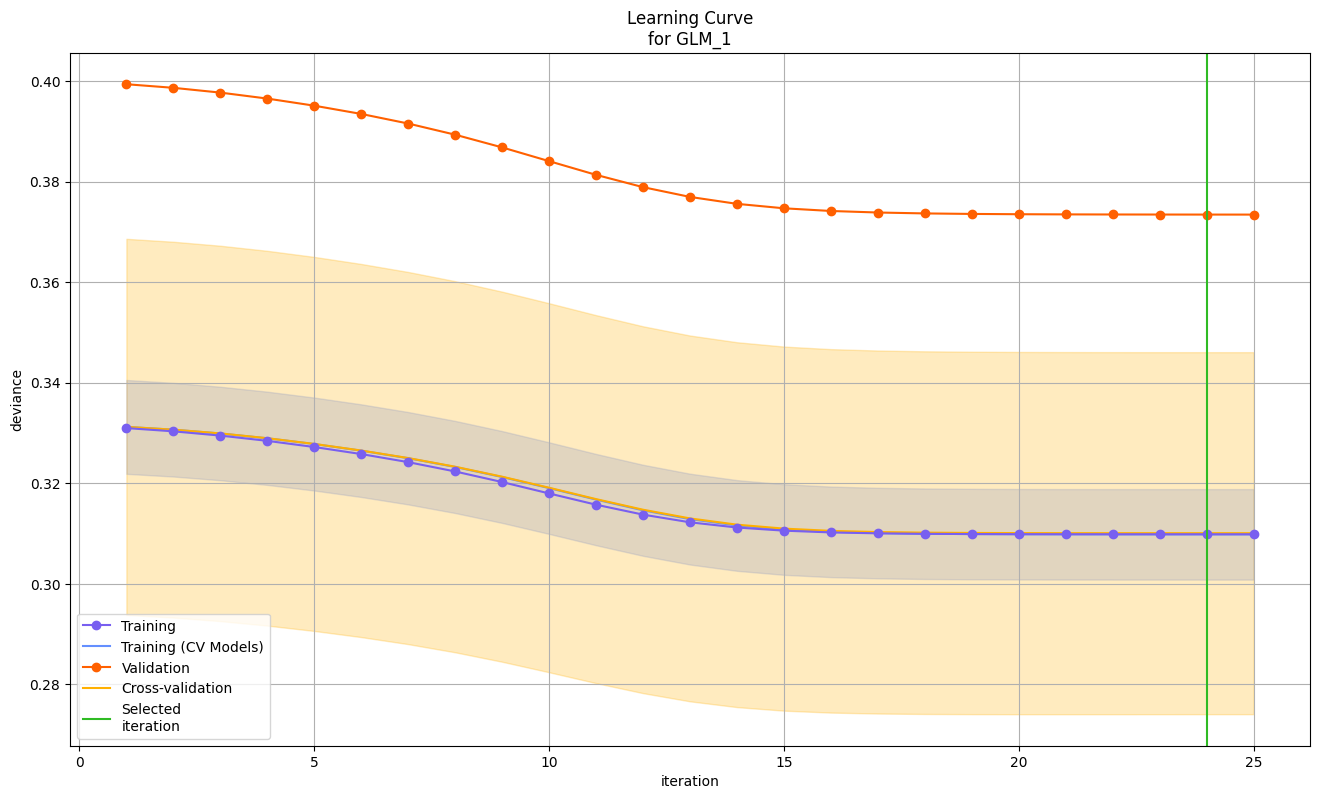

In [17]:
for model_id in model_ids:
  try:
    learning_curve_plot = h2o.get_model(model_id).learning_curve_plot()
  except:
    print(model_id, "- ERROR PLOT")

# Сохранение лучше модели

Довольно стаблильный показатель по Р-квадарт

In [18]:
#besy_model_id = 'StackedEnsemble_BestOfFamily_1_AutoML_4_20230921_114817'

In [19]:
# Сохранение лучшей модели
#besy_model = h2o.get_model(besy_model_id)
#h2o.save_model(besy_model, path = "./models")